In [11]:
import torch
import matplotlib.pyplot as plt
import sys
import os
import numpy as np 
import os.path as osp
import pickle
#from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import shutil

from tqdm import tqdm

In [12]:
np.random.seed(42)

T = 60
M = 121 # sensor 개수
D = np.linspace(0, T, M) # sensor

N = 1000 # train data 개수
test_N=200 # test data 개수


S0 = 350
I0 = 10 
R0 = 2.5 # basic reproduction number
gamma  = 0.25
beta = R0*gamma/S0

x0 = (S0,I0) # initial condition
dict_D = {v:i for i,v in enumerate(D)}

In [13]:
def u(t,x):
    if t in dict_D:
        return x[dict_D[t]]
    return np.random.rand(1)

def func(t,Y,x): # Y[0] = S, Y[1] = I
    return -beta*Y[0]*Y[1]-u(t,x)*Y[0], beta*Y[0]*Y[1]-gamma*Y[1]

In [14]:
# x = np.random.rand(M)
# sol = solve_ivp(func, (0,T), x0, method='RK45',t_eval=D,args=(x,))

In [15]:
train_x = []
train_y = []
test_x = []
test_y = []

#Train data
for i in tqdm(range(N)):

    #c = [2*_range*np.random.rand(order)-_range]
    #x = np.polynomial.chebyshev.Chebyshev(c[0])(D)
    #y = odeint(func, x0, D, args = tuple(c))
    
    x = np.random.rand(M)
    sol = solve_ivp(func, (0,T), x0, method='RK45',t_eval=D,args=(x,))
    
    for j in D:
        train_x.append(np.append(x, j))

    for j in range(len(D)):
        train_y.append(sol.y[:,j])

train_x = torch.as_tensor(train_x).reshape(N*len(D), len(D) + 1) 
train_y = torch.as_tensor(train_y).reshape(N*len(D),2)
print('train_data_done')

  5%|███▊                                                                            | 47/1000 [00:03<01:17, 12.33it/s]


KeyboardInterrupt: 

In [6]:
#Test data
for i in tqdm(range(test_N)):
#     c = [2*_range*np.random.rand(order)-_range]
#     x = np.polynomial.chebyshev.Chebyshev(c[0])(D)
#     y = odeint(func, x0, D, args = tuple(c))

    x = np.random.rand(M)
    sol = solve_ivp(func, (0,T), x0, method='RK45',t_eval=D,args=(x,))
    
    for j in D:
        test_x.append(np.append(x, j))

    for j in range(len(D)):
        test_y.append(sol.y[:,j])

test_x = torch.as_tensor(test_x).reshape(test_N*len(D), len(D) + 1)
test_y = torch.as_tensor(test_y).reshape(test_N*len(D), 2)
print('test_data_done')

data = {'train_X' : train_x, 'train_Y' : train_y, 'test_X' : test_x, 'test_Y' : test_y, 'M' : len(D)}

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:16<00:00, 12.17it/s]


test_data_done


In [7]:
# def test_func(y,t):
#     return 2*y+t
    
# y = odeint(test_func, x0, D)

# x = D

# plt.figure(figsize=(10,5))
# plt.subplot(1, 1, 1)  
# plt.plot(D, x, label='input function')
# plt.plot(D, y, label='output function')
# #plt.xlim(0,1)
# #plt.ylim(0,2)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('input function')
# plt.legend()

In [8]:
make_data=True
file_name='SIR_N'+str(N)+'_M'+str(M)+'.pickle'
print(file_name, 'is saved')

SIR_N1000_M121.pickle is saved


In [9]:
if make_data:
    with open("../data/"+file_name,"wb") as fw:
        pickle.dump(data, fw)
    load_data=data
else:
    ## load dataset
    with open("../data/"+file_name,"rb") as fr:
        load_data= pickle.load(data)

In [10]:
print(load_data['train_X'].shape,load_data['train_Y'].shape,load_data['test_X'].shape,load_data['test_Y'].shape)

torch.Size([121000, 122]) torch.Size([121000, 2]) torch.Size([24200, 122]) torch.Size([24200, 2])


Text(0.5, 0, 't')

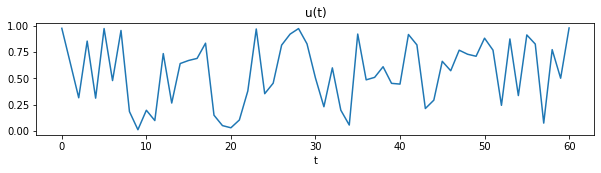

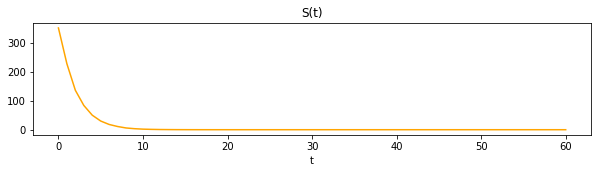

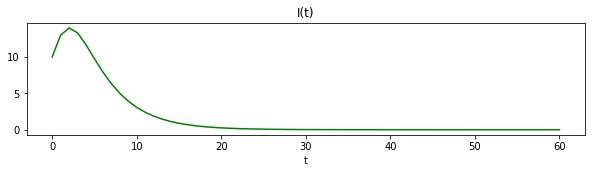

In [66]:
idx=np.random.randint(0,N)

x=load_data['train_X'][M*idx][:M]
y=load_data['train_Y'][M*idx:M*idx+M]

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 1)  
plt.plot(D, x)
plt.xlabel('t')
plt.title('u(t)')

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 2)  
plt.plot(D, y[:,0],'orange')
plt.title('S(t)')
plt.xlabel('t')

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 3)  
plt.plot(D, y[:,1],'g')
plt.title('I(t)')
plt.xlabel('t')

#plt.legend()